In [2]:
import pandas as pd

In [3]:
# Загрузка данных
data = pd.read_csv("data.csv", delimiter=";")

In [4]:
# Вывод данных
data

title               artist  \
0                                    Flowers          Miley Cyrus   
1                          Cupid - Twin Ver.          FIFTY FIFTY   
2                                       BESO              ROSALÍA   
3                         Boy's a liar Pt. 2       PinkPantheress   
4     Creepin' (with The Weeknd & 21 Savage)         Metro Boomin   
...                                      ...                  ...   
2380                              Southbound           Beach Blvd   
2381     Dance with Somebody - Radio Version           Mando Diao   
2382                                    Flow      Desire Machines   
2383                      Scared of the Dark  Everything Brighter   
2384                                   Sorry                LEADR   

             top genre  year  bpm  energy  danceability  dB  liveness  \
0                  pop  2023  118      68            71  -4         3   
1     k-pop girl group  2023  120      59            78  -8        35   
2                  pop  2023   95      64            77  -7        17   
3          bronx drill  2023  133      81            70  -8        25   
4                  rap  2022   98      62            72  -6         8   
...                ...   ...  ...     ...           ...  ..       ...   
2380              rock  2023  140      88            60  -6        10   
2381     dalarna indie  2009  150      90            55  -4        36   
2382             indie  2022  100      87            60  -7         9   
2383               pop  2023  120      80            65  -6         7   
2384    tropical house  2023   95      64            66 -10        19   

      valence  duration  acousticness  speechiness  popularity  
0          65       200             6            7          98  
1          73       174            44            3          97  
2          53       195            74           14          96  
3          86       131            25            5          96  
4          17       222            42            5          96  
...       ...       ...           ...          ...         ...  
2380       49       228            19            4          21  
2381       51       241             0            9          16  
2382       74       255             0            5          15  
2383       61       179             0            6          11  
2384       40       174             0            6           5  

[2385 rows x 14 columns]

# Разведочный анализ данных

In [5]:
# Проверка наличия дубликатов
duplicates = data.duplicated()
print("Количество дубликатов:", duplicates.sum())

Количество дубликатов: 0


In [6]:
# Оценка пропущенных значений
missing_values = data.isnull().sum()
print("Количество пропущенных значений:")
print(missing_values)

Количество пропущенных значений:
title           0
artist          0
top genre       0
year            0
bpm             0
energy          0
danceability    0
dB              0
liveness        0
valence         0
duration        0
acousticness    0
speechiness     0
popularity      0
dtype: int64


In [7]:
import numpy as np

# Определение границ выбросов (за пределами 3 стандартных отклонений)
outlier_threshold = 3

# Обработка выбросов для числовых признаков
numeric_features = ['bpm', 'energy', 'danceability', 'dB', 'liveness', 'valence', 'duration', 'acousticness', 'speechiness', 'popularity']

# Обработка выбросов для числовых признаков
outlier_counts = {}

for feature in numeric_features:
    # Вычисление границ выбросов
    lower_bound = data[feature].mean() - (outlier_threshold * data[feature].std())
    upper_bound = data[feature].mean() + (outlier_threshold * data[feature].std())
    
    # Подсчет количества выбросов
    outliers = (data[feature] < lower_bound) | (data[feature] > upper_bound)
    outlier_counts[feature] = {
        'count': outliers.sum(),
        'percentage': outliers.sum() / len(data[feature]) * 100
    }

# Вывод информации о количестве выбросов и их процентах
print("Количество выбросов и их проценты:")
for feature, info in outlier_counts.items():
    print(f"{feature}: {info['count']} ({info['percentage']:.2f}%)")

Количество выбросов и их проценты:
bpm: 10 (0.42%)
energy: 11 (0.46%)
danceability: 8 (0.34%)
dB: 33 (1.38%)
liveness: 64 (2.68%)
valence: 0 (0.00%)
duration: 17 (0.71%)
acousticness: 67 (2.81%)
speechiness: 44 (1.84%)
popularity: 31 (1.30%)


In [8]:
from sklearn.preprocessing import LabelEncoder

# Преобразование категориальных признаков с помощью Label Encoding
categorical_features = ['title', 'artist', 'top genre']

label_encoder = LabelEncoder()
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])


             title       artist    top genre         year          bpm  \
count  2385.000000  2385.000000  2385.000000  2385.000000  2385.000000   
mean   1129.088470   481.745493   118.857442  2011.116981   119.783648   
std     649.534223   291.454568    70.249339     6.748364    27.273075   
min       0.000000     0.000000     0.000000  1985.000000    60.000000   
25%     567.000000   227.000000    67.000000  2005.000000    98.000000   
50%    1132.000000   467.000000    95.000000  2011.000000   120.000000   
75%    1689.000000   740.000000   187.000000  2017.000000   134.000000   
max    2260.000000  1013.000000   265.000000  2023.000000   211.000000   

            energy  danceability           dB     liveness      valence  \
count  2385.000000   2385.000000  2385.000000  2385.000000  2385.000000   
mean     69.792453     67.034801    -5.771488    17.787002    54.233962   
std      16.164609     13.719049     2.072153    13.629287    22.458084   
min       6.000000     18.000000 

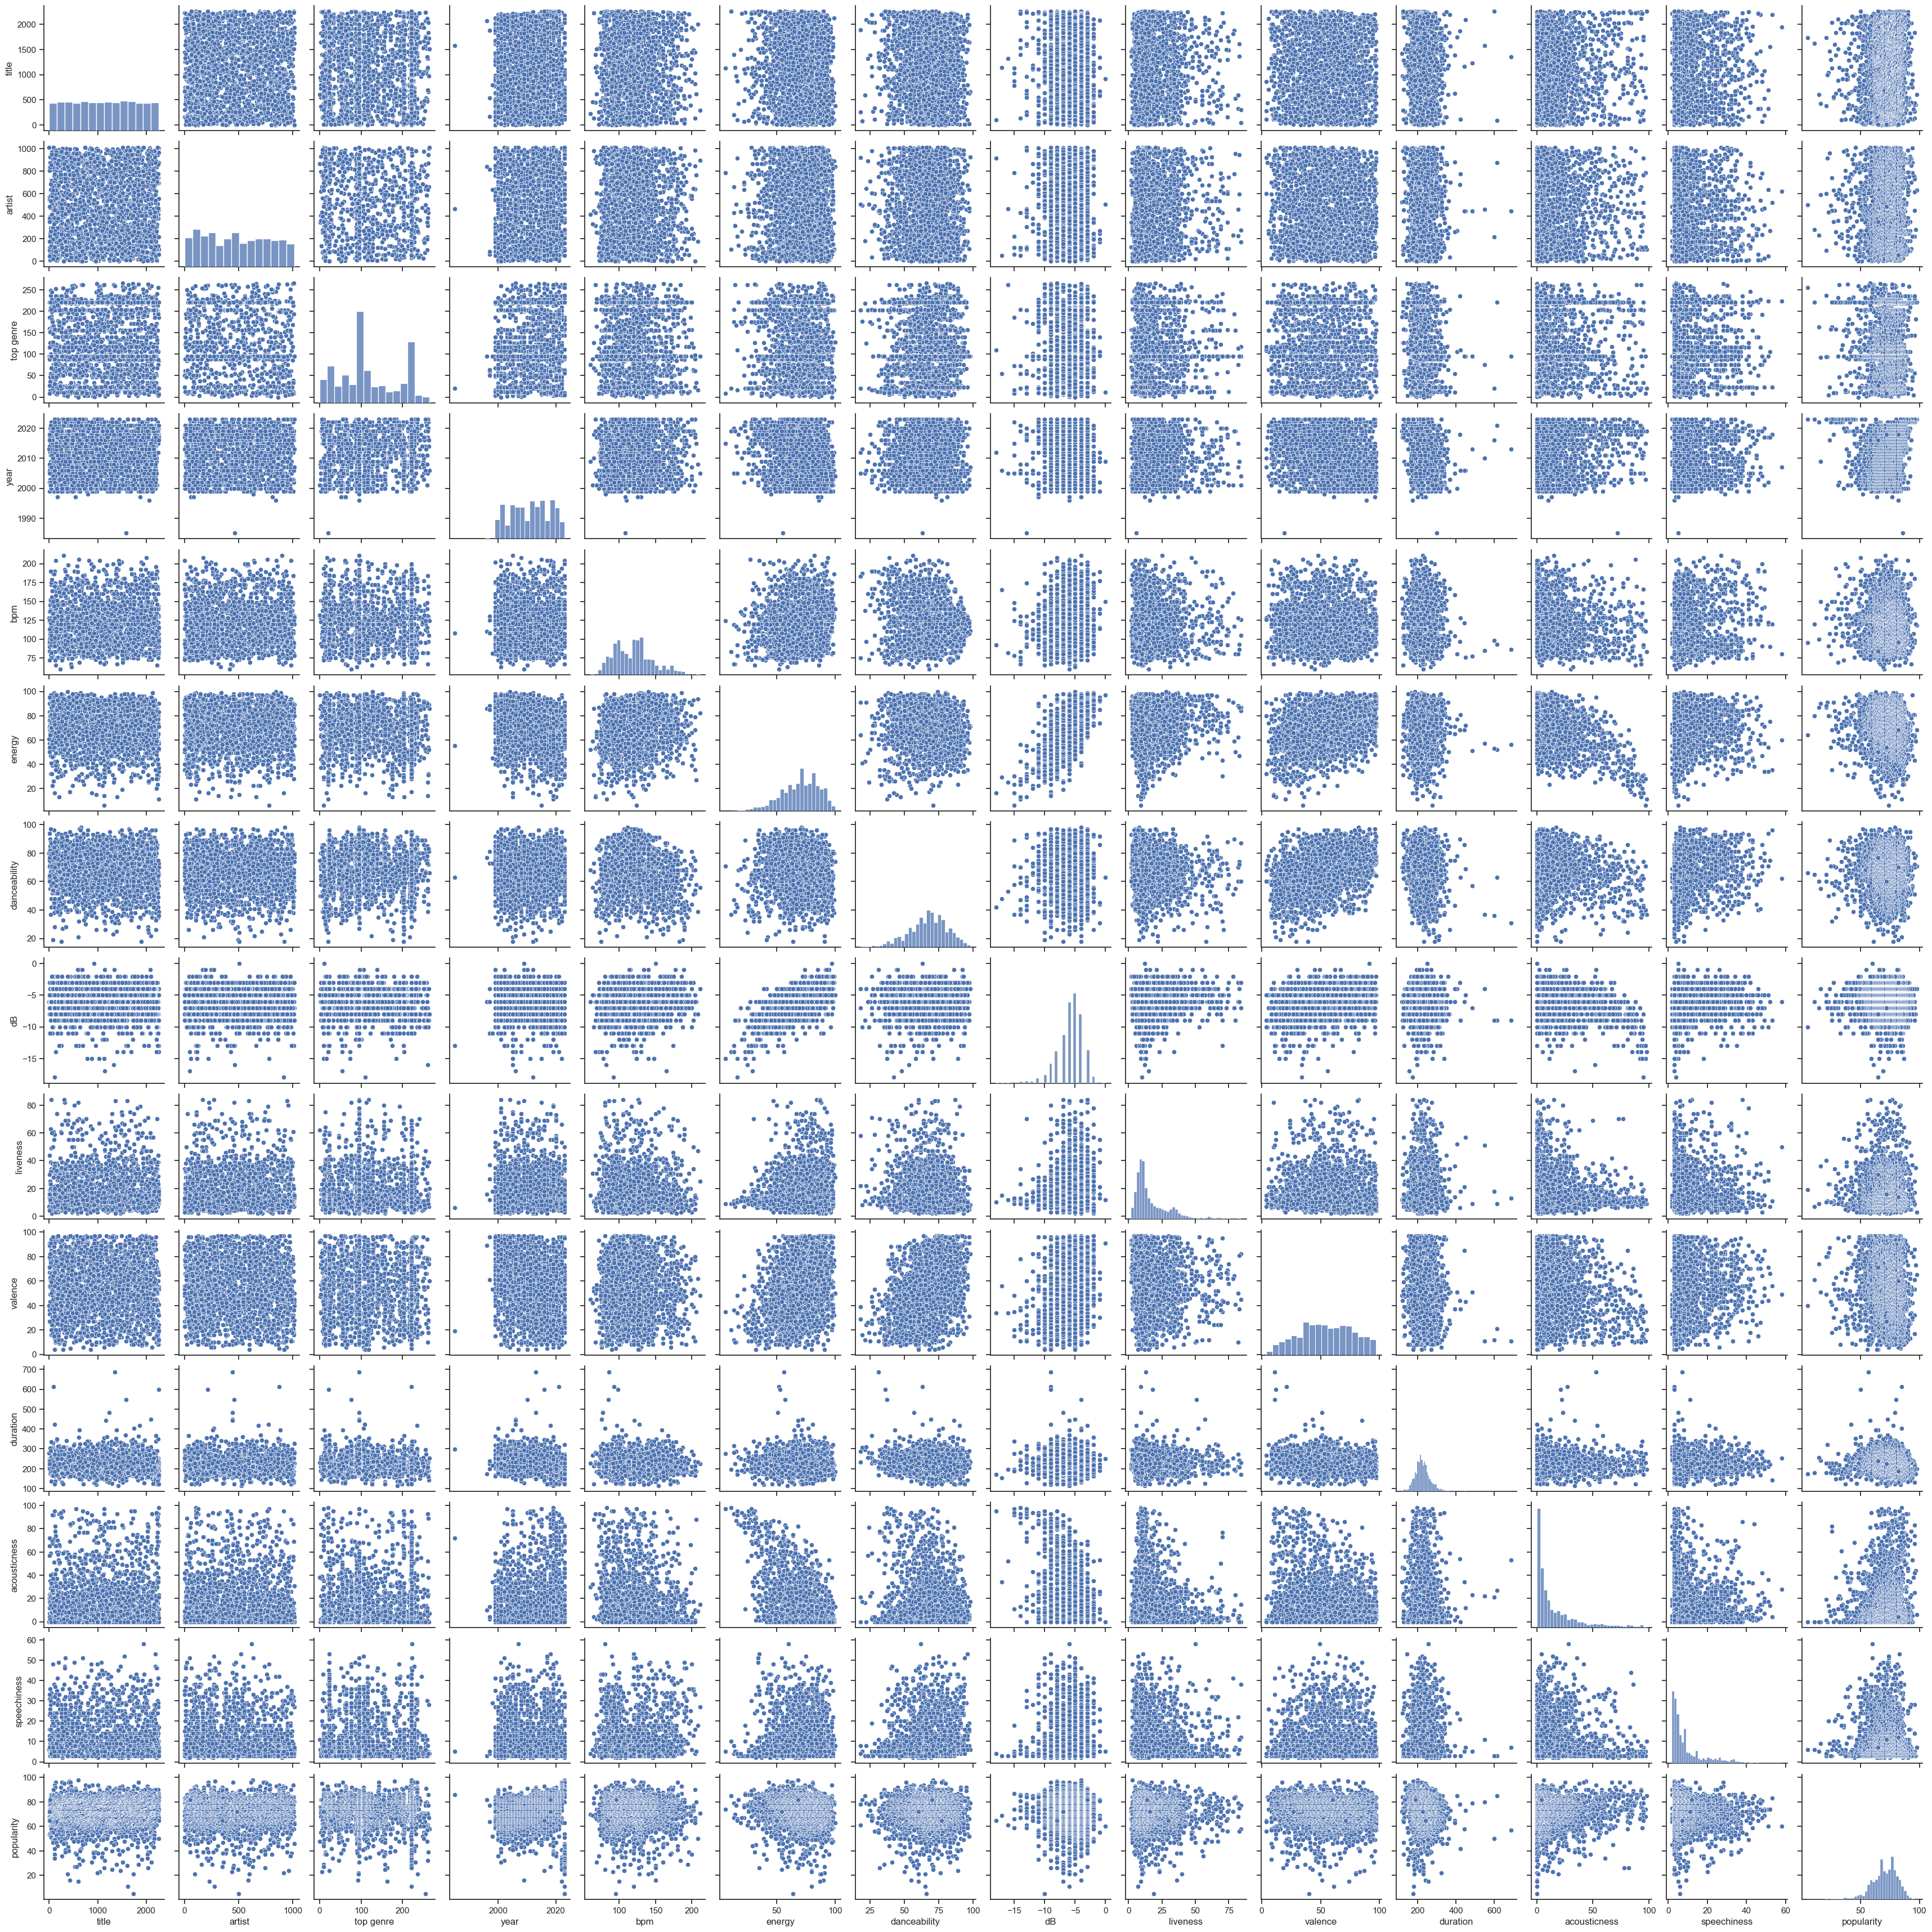

In [10]:
# Описательные статистики
statistics = data.describe()
print(statistics)

# Графики распределения
import matplotlib.pyplot as plt
import seaborn as sns

# Построение графиков распределения
sns.set(style="ticks")
sns.pairplot(data)
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

# Выбираем числовые признаки для нормализации
numeric_features = ['bpm', 'energy', 'danceability', 'dB', 'liveness', 'valence', 'duration', 'acousticness', 'speechiness', 'popularity']

# Нормализация числовых признаков с помощью Standard Scaling
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])


In [12]:
# Вывод конечного набора данных
data

title  artist  top genre  year       bpm    energy  danceability  \
0       601     629        221  2023 -0.065413 -0.110911      0.289089   
1       407     281        181  2023  0.007934 -0.667799      0.799436   
2       131     750        221  2023 -0.908913 -0.358417      0.726529   
3       263     730         56  2023  0.484695  0.693484      0.216183   
4       400     617        230  2022 -0.798891 -0.482170      0.361996   
...     ...     ...        ...   ...       ...       ...           ...   
2380   1736      94        236  2023  0.741412  1.126620     -0.512884   
2381    421     588         93  2009  1.108151  1.250373     -0.877417   
2382    600     230        163  2022 -0.725543  1.064743     -0.512884   
2383   1618     279        221  2023  0.007934  0.631607     -0.148350   
2384   1732     498        255  2023 -0.908913 -0.358417     -0.075444   

            dB  liveness   valence  duration  acousticness  speechiness  \
0     0.855082 -1.085171  0.479484 -0.600374     -0.474166    -0.326970   
1    -1.075683  1.263207  0.835778 -1.201980      1.400203    -0.747190   
2    -0.592992 -0.057756 -0.054957 -0.716068      2.879967     0.408415   
3    -1.075683  0.529339  1.414756 -2.196944      0.463018    -0.537080   
4    -0.110300 -0.718237 -1.658279 -0.091323      1.301552    -0.537080   
...        ...       ...       ...       ...           ...          ...   
2380 -0.110300 -0.571463 -0.233104  0.047510      0.167066    -0.642135   
2381  0.855082  1.336594 -0.144030  0.348313     -0.770119    -0.116860   
2382 -0.592992 -0.644850  0.880315  0.672254     -0.770119    -0.537080   
2383 -0.110300 -0.791624  0.301337 -1.086287     -0.770119    -0.432025   
2384 -2.041065  0.089018 -0.633934 -1.201980     -0.770119    -0.432025   

      popularity  
0       2.406284  
1       2.318698  
2       2.231112  
3       2.231112  
4       2.231112  
...          ...  
2380   -4.337840  
2381   -4.775771  
2382   -4.863357  
2383   -5.213701  
2384   -5.739217  

[2385 rows x 14 columns]

# Отбор признаков

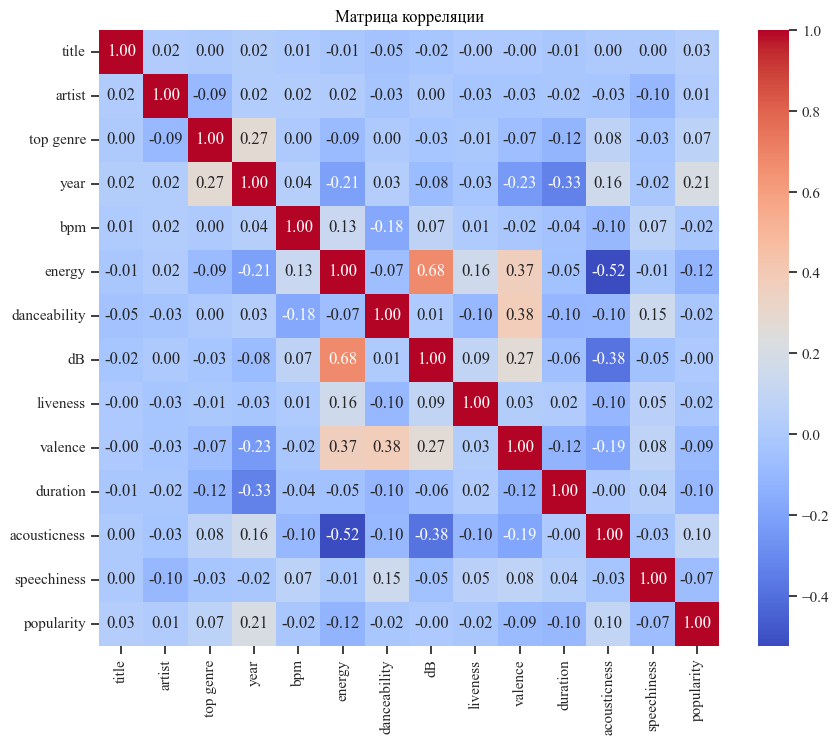

In [19]:
import seaborn as sns
import matplotlib

# Задаем шрифт Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Задаем черный цвет текста
matplotlib.rcParams['text.color'] = 'black'

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

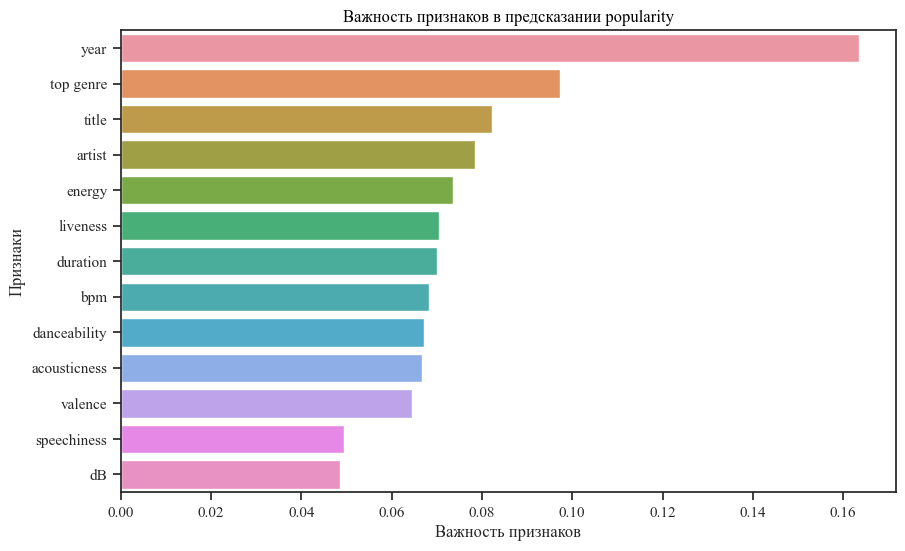

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Разделение данных на признаки и целевую переменную
X = data.drop(columns=['popularity'])
y = data['popularity']

# Инициализация модели случайного леса
rf = RandomForestRegressor()

# Обучение модели для оценки важности признаков
rf.fit(X, y)

# Важность признаков
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Важность признаков в предсказании popularity')
plt.show()


In [22]:
columns_to_drop = ['dB', 'duration', 'valence', 'speechiness']
data = data.drop(columns=columns_to_drop)

# Выбор модели прогнозирования и настройка гиперпараметров 

In [23]:
from sklearn.model_selection import train_test_split

# Разбиение данных на признаки (X) и целевую переменную (y)
X = data.drop(columns=['popularity'])
y = data['popularity']

# Разбиение на обучающую, валидационную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Создание экземпляра каждой модели
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor()
knn_model = KNeighborsRegressor()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

# Определение сетки гиперпараметров для каждой модели
linear_params = {}
tree_params = {'max_depth': [None, 5, 10, 15],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]}
knn_params = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance']}
rf_params = {'n_estimators': [100, 200, 300],
             'max_depth': [None, 5, 10],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}
gb_params = {'n_estimators': [100, 200, 300],
             'learning_rate': [0.01, 0.1, 1.0],
             'max_depth': [3, 5, 10],
             'min_samples_split': [2, 5, 10]}

# Создание объекта GridSearchCV для каждой модели
linear_grid = GridSearchCV(linear_model, linear_params, cv=5)
tree_grid = GridSearchCV(tree_model, tree_params, cv=5)
knn_grid = GridSearchCV(knn_model, knn_params, cv=5)
rf_grid = GridSearchCV(rf_model, rf_params, cv=5)
gb_grid = GridSearchCV(gb_model, gb_params, cv=5)

# Обучение моделей и выбор наилучших гиперпараметров
linear_grid.fit(X_train, y_train)
tree_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)

# Вывод наилучших гиперпараметров и оценки производительности моделей
print("Наилучшие параметры для линейной регрессии:", linear_grid.best_params_)
print("Наилучший результат для линейной регрессии:", linear_grid.best_score_)
print()
print("Наилучшие параметры для дерева решений:", tree_grid.best_params_)
print("Наилучший результат для дерева решений:", tree_grid.best_score_)
print()
print("Наилучшие параметры для метода ближайших соседей (KNN):", knn_grid.best_params_)
print("Наилучший результат для метода ближайших соседей (KNN):", knn_grid.best_score_)
print()
print("Наилучшие параметры для случайного леса:", rf_grid.best_params_)
print("Наилучший результат для случайного леса:", rf_grid.best_score_)
print()
print("Наилучшие параметры для градиентного бустинга:", gb_grid.best_params_)
print("Наилучший результат для градиентного бустинга:", gb_grid.best_score_)


Наилучшие параметры для линейной регрессии: {}
Наилучший результат для линейной регрессии: 0.027959148773492527

Наилучшие параметры для дерева решений: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Наилучший результат для дерева решений: -0.09756550467347883

Наилучшие параметры для метода ближайших соседей (KNN): {'n_neighbors': 7, 'weights': 'uniform'}
Наилучший результат для метода ближайших соседей (KNN): -0.12306565225953685

Наилучшие параметры для случайного леса: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Наилучший результат для случайного леса: 0.09494383185820188

Наилучшие параметры для градиентного бустинга: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 300}
Наилучший результат для градиентного бустинга: 0.09655153287069765


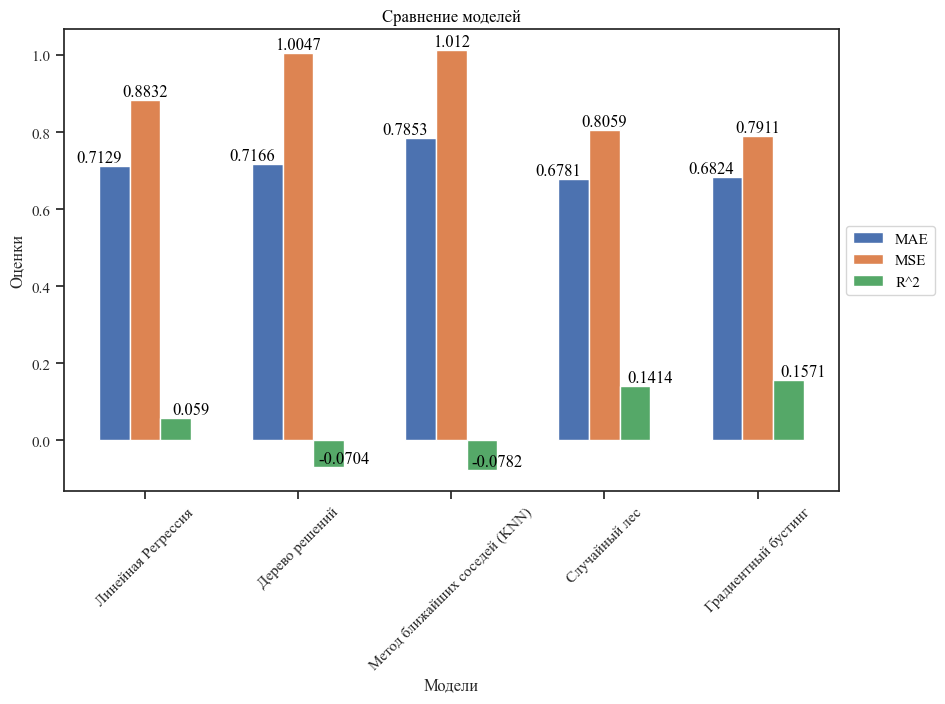

In [27]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Списки для хранения значений метрик
mae_scores = []
mse_scores = []
r2_scores = []

# Список моделей
models = ['Линейная Регрессия', 'Дерево решений', 'Метод ближайших соседей (KNN)', 'Случайный лес', 'Градиентный бустинг']

# Список моделей
model_list = [linear_grid.best_estimator_,
              tree_grid.best_estimator_,
              knn_grid.best_estimator_,
              rf_grid.best_estimator_,
              gb_grid.best_estimator_]

# Вычисление метрик для каждой модели
for model in model_list:
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)

# Создание позиций на оси X для каждой модели
x_positions = np.arange(len(models))

# Создание графиков для MAE, MSE и R^2
plt.figure(figsize=(10, 6))
plt.bar(x_positions - 0.2, mae_scores, width=0.2, label='MAE')
plt.bar(x_positions, mse_scores, width=0.2, label='MSE')
plt.bar(x_positions + 0.2, r2_scores, width=0.2, label='R^2')
plt.xlabel('Модели')
plt.ylabel('Оценки')
plt.title('Сравнение моделей')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(x_positions, models, rotation=45)

# Добавление значений метрик над столбцами
for i in range(len(models)):
    plt.text(x_positions[i] - 0.3, mae_scores[i] + 0.01, str(round(mae_scores[i], 4)), ha='center')
    plt.text(x_positions[i], mse_scores[i] + 0.01, str(round(mse_scores[i], 4)), ha='center')
    plt.text(x_positions[i] + 0.3, r2_scores[i] + 0.01, str(round(r2_scores[i], 4)), ha='center')

plt.show()


In [28]:
# Выбор модели с лучшими показателями
best_model_index = np.argmax(r2_scores)
best_model = models[best_model_index]
best_model_name = models[best_model_index]

print(f"Лучшая модель: {best_model_name}")

Лучшая модель: Градиентный бустинг
